<a href="https://colab.research.google.com/github/shdccywork/warehouse_forecast/blob/main/Warehouse_Forecast_(masked).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleansing / Masksing >>> Create Dataframe for Machine Leanring >>> Statistics >>> XGBoost >>> RESE, R-square >>> Visulization

### Other - create folders

1. Raw_data_masked
2. Dataframe_ML
3. XGBoost_RMSE_R2
4. XGBoost_Acutal_vs_Prediction
5. Prediction_plot

##Install darts

In [2]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.2/934.2 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.3 MB/s eta 0:00:00


# Import libraray

In [3]:
import pandas as pd
import os
import numpy as np
import holidays
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
# from statsmodels.tsa.arima.model import ARIMA
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tqdm import *
import matplotlib.dates as mdates


# Create folders

In [4]:
if os.path.exists('/content/Raw_data_masked') == False:
  os.mkdir('/content/Raw_data_masked')

# Change the current working directory
os.chdir('/content/Raw_data_masked')

In [5]:
if os.path.exists('/content/Dataframe_ML') == False:
  os.mkdir('/content/Dataframe_ML')

# Change the current working directory
# os.chdir('/content/Dataframe_ML')

In [6]:
if os.path.exists('/content/XGBoost_RMSE_R2') == False:
  os.mkdir('/content/XGBoost_RMSE_R2')

# Change the current working directory
# os.chdir('/content/XGBoost_RMSE_R2')

In [7]:
if os.path.exists('/content/XGBoost_Acutal_vs_Prediction') == False:
  os.mkdir('/content/XGBoost_Acutal_vs_Prediction')

# Change the current working directory
# os.chdir('/content/XGBoost_RMSE_R2')

In [8]:
if os.path.exists('/content/ACF') == False:
  os.mkdir('/content/ACF')

# Change the current working directory
# os.chdir('/content/ACF')

In [9]:
if os.path.exists('/content/PACF') == False:
  os.mkdir('/content/PACF')

# Change the current working directory
# os.chdir('/content/APCF')

In [10]:
if os.path.exists('/content/ADF') == False:
  os.mkdir('/content/ADF')

# Change the current working directory
# os.chdir('/content/ADF')

In [11]:
if os.path.exists('/content/EDA') == False:
  os.mkdir('/content/EDA')

# Change the current working directory
# os.chdir('/content/EDA')

# Read masked data from GitHub

In [12]:
! wget https://github.com/shdccywork/warehouse_forecast/raw/refs/heads/main/Normal_Delivery_masked.zip

--2024-11-11 13:38:37--  https://github.com/shdccywork/warehouse_forecast/raw/refs/heads/main/Normal_Delivery_masked.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shdccywork/warehouse_forecast/refs/heads/main/Normal_Delivery_masked.zip [following]
--2024-11-11 13:38:37--  https://raw.githubusercontent.com/shdccywork/warehouse_forecast/refs/heads/main/Normal_Delivery_masked.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 303905 (297K) [application/zip]
Saving to: ‘Normal_Delivery_masked.zip’

Normal_Delivery_mas 100%[===================>] 296.78K  --.-KB/s    in 0.04s   

2024-11-11 13:

#Unzip the masked data

Check file type of the zip

In [13]:
!file Normal_Delivery_masked.zip

Normal_Delivery_masked.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


Unzip the zip file & save into Folder "Raw_data_masked"

In [14]:
!unzip Normal_Delivery_masked.zip -d /content/Raw_data_masked

Archive:  Normal_Delivery_masked.zip
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202311 R1.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202402_Sheldon.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202401_R2_Sheldon.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202312.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202309 Part 2-R4.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202405_update.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202310_R1.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202404_R2.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202309 Part 1.csv_masked.csv  
  inflating: /content/Raw_data_masked/Delivery Billing Summary-202406.csv_masked.csv  


### After data masking and cleansing -Create a dataframe from all csv

Read files in folder - "Raw_data_masked'

In [15]:
# Read raw data

'''change directory_path from '/content/Raw_data' to '/content/Raw_data_masked' after data is cleansed in Data cleansing - Masking Secton
Folder "Dataframe_ML" must be removed after data is cleansed '''

# Read above instruction before start"
directory_path = '/content/Raw_data_masked' # /content/Raw_data_masked' or '/content/Raw_data'
csv_files = [ f for f in os.listdir(directory_path) if f.endswith('.csv')]
print(csv_files)


['Delivery Billing Summary-202402_Sheldon.csv_masked.csv', 'Delivery Billing Summary-202406.csv_masked.csv', 'Delivery Billing Summary-202311 R1.csv_masked.csv', 'Delivery Billing Summary-202404_R2.csv_masked.csv', 'Delivery Billing Summary-202401_R2_Sheldon.csv_masked.csv', 'Delivery Billing Summary-202309 Part 1.csv_masked.csv', 'Delivery Billing Summary-202405_update.csv_masked.csv', 'Delivery Billing Summary-202309 Part 2-R4.csv_masked.csv', 'Delivery Billing Summary-202312.csv_masked.csv', 'Delivery Billing Summary-202310_R1.csv_masked.csv']


Combine all csv files and create a dataframe for all files

In [16]:
# create a dataframe

data_frames = []

# Loop through the CSV files and read each one into a DataFrame
for i, file in enumerate(csv_files):
    file_path = os.path.join(directory_path, file)  # Construct the full file path
    df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
    df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])
    data_frames.append(df)  # Append the DataFrame to the list


df_combined = pd.concat(data_frames, ignore_index= True)
# df_combined['Delivery Date'] = pd.to_datetime(df_combined['Delivery Date'])
print(df_combined.dtypes)


Delivery Date           datetime64[ns]
MDO #                           object
DN# (Battery)                   object
Address                         object
# of CTN                       float64
Delivery Charge                float64
GW (Battery)                   float64
Gate Charges                    object
Tunnel Fee                      object
Doc Registration Fee            object
Overtime hour                  float64
Others                         float64
Remarks                         object
Total Charge                   float64
CODE                            object
Charter Truck Type             float64
# of Pallet                    float64
Customer_code_new               object
Section_code_new                object
OT                             float64
dtype: object


# Create a Dataframe for ML

7 datadrames will be created with different features
the creation of each dataframe is dependent to the dataframe in the previous steps

The name of each dataframe tells what the features have been added to the dataframe


1. df_warehouse
2. df_warehouse_date_range
3. df_warehouse_date_range_YMD
4. df_warehouse_date_range_YMD_holidays
5. df_warehouse_date_range_YMD_holidays_lags
6. df_warehouse_date_range_YMD_holidays_lags_seasonal
7. df_warehouse_date_range_YMD_holidays_lags_seasonal_trend **bold text**

## 1. Delivery Date vs. # of CTN

In [38]:
# Rename the dataframe
df_combined.rename(columns = {'Delivery Date':'date'}, inplace=True)

# Create df_warehouse
df_warehouse = df_combined.groupby('date').agg({'# of CTN':'sum'},observed=False)
df_warehouse.head(20)


,# of CTN
date,
2023-08-21,1491.0
2023-08-22,1167.0
2023-08-23,1609.0
2023-08-24,1787.0
2023-08-25,992.0
2023-08-26,995.0
2023-08-28,873.0
2023-08-29,1317.0
2023-08-30,1128.0


1.5 . Add fearure : Date range

In [18]:
df_combined.rename(columns=({'Delivery Date':'date'}), inplace=True)
start_date = df_combined['date'].min()
end_date = df_combined['date'].max()


#Create a full date range
df_full_date_range = pd.date_range(start= start_date, end= end_date, freq='D') # dtype='datetime64[ns]
df_full_date_range

DatetimeIndex(['2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
               '2023-08-29', '2023-08-30',
               ...
               '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14',
               '2024-06-15', '2024-06-16', '2024-06-17', '2024-06-18',
               '2024-06-19', '2024-06-20'],
              dtype='datetime64[ns]', length=305, freq='D')

In [19]:
df_warehouse_date_range= pd.merge(df_full_date_range.to_frame(name='date'), df_warehouse, left_index=True, right_index=True, how='left')
df_warehouse_date_range.fillna(0, inplace=True)




## 2. Create a time sereis for ML with a lag of 7 days

A time line dataframe will be created based on the date range in df_combined


---


A lag of 7 days is created for XGboost
1. Otherwise, this dataframe cannot be used for prediction
2. To compare the forecasting result between Lag 7 and Lag 1 - 7


In [20]:

# creata a lag 7
# lag 7 is created for XGboost,
# 1) Otherwise, this dataframe cannot be used for prediction
# 2) To compare the forecasting result between Lag 7 and Lag 1 - 7
df_warehouse_date_range['Lag_7'] = df_warehouse_date_range['# of CTN'].shift(7)


# fill na to date which has no outbound volume as the warehouse operations stops on that date
df_warehouse_date_range.fillna(0, inplace = True)

# save dataframe
df_warehouse_date_range.to_csv('/content/Dataframe_ML/df_warehouse_date_range.csv', index=False)
df_warehouse_date_range



,date,# of CTN,Lag_7
2023-08-21,2023-08-21,1491.0,0.0
2023-08-22,2023-08-22,1167.0,0.0
2023-08-23,2023-08-23,1609.0,0.0
2023-08-24,2023-08-24,1787.0,0.0
2023-08-25,2023-08-25,992.0,0.0
...,...,...,...
2024-06-16,2024-06-16,0.0,0.0
2024-06-17,2024-06-17,1519.0,0.0
2024-06-18,2024-06-18,2231.0,2633.0
2024-06-19,2024-06-19,1701.0,2322.0


## 3. Add fearure : year, month, day, day of year, day of week, week of year

In [21]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries

#drop lag 7
df_warehouse_date_range.drop(columns ='Lag_7', inplace=True)


df_warehsoue_date_range_YMD = df_warehouse_date_range.copy()

year = datetime_attribute_timeseries(time_index = df_full_date_range, attribute='year')
month = datetime_attribute_timeseries(time_index= df_full_date_range, attribute='month')
day = datetime_attribute_timeseries(time_index = df_full_date_range, attribute='day')
dayofyear = datetime_attribute_timeseries(time_index = df_full_date_range, attribute = 'dayofyear')
weekday = datetime_attribute_timeseries(time_index = df_full_date_range , attribute='dayofweek')
weekofyear = datetime_attribute_timeseries(time_index = df_full_date_range, attribute='weekofyear')

time_cov = year.stack(month).stack(day).stack(dayofyear).stack(weekday).stack(weekofyear)
time_cov = time_cov.pd_dataframe()
time_cov.index

# Merge time_cov and df_warehsoue_date_range_YMD
df_warehsoue_date_range_time_feature = pd.merge(time_cov, df_warehsoue_date_range_YMD, left_index=True,right_index=True, how='left')

# save to csv
df_warehsoue_date_range_time_feature.to_csv('/content/Dataframe_ML/df_warehouse_date_range_time_feature.csv', index=False)



## 4.Add fearures: hk_holidays

In [22]:
#retreive hong Kogn holidays
hk_holidays = holidays.HongKong()

# copy the df_warehsoue_timeline and create df_warehouse_timeline_holidays for adding HK holiday
df_warehsoue_date_range_time_feature_holidays = df_warehsoue_date_range_time_feature.copy()


# Create holiday appneded dataframe
df_warehsoue_date_range_time_feature_holidays['is_hk_holiday'] = df_warehsoue_date_range_time_feature_holidays['date'].apply(lambda x : x in hk_holidays) *1

# save df_warehouse_holidays
df_warehsoue_date_range_time_feature_holidays.to_csv('/content/Dataframe_ML/df_warehsoue_date_range_time_feature_holidays.csv', index=False)

df_warehsoue_date_range_time_feature_holidays

,year,month,day,dayofyear,dayofweek,weekofyear,date,# of CTN,is_hk_holiday
time,,,,,,,,,
2023-08-21,2023.0,7.0,20.0,232.0,0.0,33.0,2023-08-21,1491.0,0
2023-08-22,2023.0,7.0,21.0,233.0,1.0,33.0,2023-08-22,1167.0,0
2023-08-23,2023.0,7.0,22.0,234.0,2.0,33.0,2023-08-23,1609.0,0
2023-08-24,2023.0,7.0,23.0,235.0,3.0,33.0,2023-08-24,1787.0,0
2023-08-25,2023.0,7.0,24.0,236.0,4.0,33.0,2023-08-25,992.0,0
...,...,...,...,...,...,...,...,...,...
2024-06-16,2024.0,5.0,15.0,167.0,6.0,23.0,2024-06-16,0.0,0
2024-06-17,2024.0,5.0,16.0,168.0,0.0,24.0,2024-06-17,1519.0,0
2024-06-18,2024.0,5.0,17.0,169.0,1.0,24.0,2024-06-18,2231.0,0


## 5. Add features: lags ( to df_warehouse_holidays)

In [23]:
# create lags
max_lag = 7 # we could try 7 14 21 28 and check rmse and r2 for the best lag result
df_warehsoue_date_range_time_feature_holidays_lags = df_warehsoue_date_range_time_feature_holidays.copy()

for lag in range(1, max_lag+1):
    print('lag_:',lag)
    df_warehsoue_date_range_time_feature_holidays_lags [f'lag_{lag}'] = df_warehsoue_date_range_time_feature_holidays_lags['# of CTN'].shift(lag)
    df_warehsoue_date_range_time_feature_holidays_lags [f'lag_{lag}'].fillna(0, inplace = True)

df_warehsoue_date_range_time_feature_holidays_lags.to_csv('/content/Dataframe_ML/df_warehsoue_date_range_time_feature_holidays_lags.csv', index=False)
print(df_warehsoue_date_range_time_feature_holidays_lags.head(30))


lag_: 1
lag_: 2
lag_: 3
lag_: 4
lag_: 5
lag_: 6
lag_: 7
              year  month   day  dayofyear  dayofweek  weekofyear       date  \
time                                                                           
2023-08-21  2023.0    7.0  20.0      232.0        0.0        33.0 2023-08-21   
2023-08-22  2023.0    7.0  21.0      233.0        1.0        33.0 2023-08-22   
2023-08-23  2023.0    7.0  22.0      234.0        2.0        33.0 2023-08-23   
2023-08-24  2023.0    7.0  23.0      235.0        3.0        33.0 2023-08-24   
2023-08-25  2023.0    7.0  24.0      236.0        4.0        33.0 2023-08-25   
2023-08-26  2023.0    7.0  25.0      237.0        5.0        33.0 2023-08-26   
2023-08-27  2023.0    7.0  26.0      238.0        6.0        33.0 2023-08-27   
2023-08-28  2023.0    7.0  27.0      239.0        0.0        34.0 2023-08-28   
2023-08-29  2023.0    7.0  28.0      240.0        1.0        34.0 2023-08-29   
2023-08-30  2023.0    7.0  29.0      241.0        2.0        34.

<ipython-input-23-52661707ba03>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_warehsoue_date_range_time_feature_holidays_lags [f'lag_{lag}'].fillna(0, inplace = True)
<ipython-input-23-52661707ba03>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

## 6.Linear conbination - seaonal

In [24]:
# Seasonal decomposition and set additive mode
result = seasonal_decompose(df_warehsoue_date_range_time_feature_holidays_lags['# of CTN'], model='additive')


# Add the seasonal decomposed result into a DataFrame , only seasonal data is needed
decomposed_df_seasonal = pd.DataFrame({
    # 'Trend': result.trend,
    'Seasonal': result.seasonal,
    # 'Residual': result.resid # we dun need residual in dataframe for forecasting
})

# fillna to NaN data in Seasonal
decomposed_df_seasonal.fillna(0)
# Create seasonal decompose df with seasonal
df_warehsoue_date_range_time_feature_holidays_lags_seasonal = pd.merge(df_warehsoue_date_range_time_feature_holidays_lags,decomposed_df_seasonal, left_index=True, right_index= True, how = 'left')
df_warehsoue_date_range_time_feature_holidays_lags_seasonal.to_csv('/content/Dataframe_ML/df_warehsoue_date_range_time_feature_holidays_lags_seasonal.csv')
df_warehsoue_date_range_time_feature_holidays_lags_seasonal


,year,month,day,dayofyear,dayofweek,weekofyear,date,# of CTN,is_hk_holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Seasonal
time,,,,,,,,,,,,,,,,,
2023-08-21,2023.0,7.0,20.0,232.0,0.0,33.0,2023-08-21,1491.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294.421441
2023-08-22,2023.0,7.0,21.0,233.0,1.0,33.0,2023-08-22,1167.0,0,1491.0,0.0,0.0,0.0,0.0,0.0,0.0,319.794009
2023-08-23,2023.0,7.0,22.0,234.0,2.0,33.0,2023-08-23,1609.0,0,1167.0,1491.0,0.0,0.0,0.0,0.0,0.0,460.470879
2023-08-24,2023.0,7.0,23.0,235.0,3.0,33.0,2023-08-24,1787.0,0,1609.0,1167.0,1491.0,0.0,0.0,0.0,0.0,836.590876
2023-08-25,2023.0,7.0,24.0,236.0,4.0,33.0,2023-08-25,992.0,0,1787.0,1609.0,1167.0,1491.0,0.0,0.0,0.0,222.753667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-16,2024.0,5.0,15.0,167.0,6.0,23.0,2024-06-16,0.0,0,75.0,2775.0,2169.0,2322.0,2633.0,0.0,0.0,-1094.203144
2024-06-17,2024.0,5.0,16.0,168.0,0.0,24.0,2024-06-17,1519.0,0,0.0,75.0,2775.0,2169.0,2322.0,2633.0,0.0,294.421441
2024-06-18,2024.0,5.0,17.0,169.0,1.0,24.0,2024-06-18,2231.0,0,1519.0,0.0,75.0,2775.0,2169.0,2322.0,2633.0,319.794009


## 7.Linear conbination - trend

In [25]:

# Create seasonal decompose df with seasonal and trend
decomposed_df_seasonal_trend = pd.DataFrame({
    'Trend': result.trend,
    'Seasonal': result.seasonal,
    # 'Residual': result.resid # we dun need residual in dataframe for forecasting
})

# fillna to NaN data in Seasonal and trend
decomposed_df_seasonal_trend.fillna(0, inplace=True)


df_warehsoue_date_range_time_feature_holidays_lags_seasonal_trend = pd.merge(df_warehsoue_date_range_time_feature_holidays_lags,decomposed_df_seasonal_trend, left_index=True, right_index= True, how = 'left')
df_warehsoue_date_range_time_feature_holidays_lags_seasonal_trend.to_csv('/content/Dataframe_ML/df_warehsoue_date_range_time_feature_holidays_lags_seasonal_trend.csv')
df_warehsoue_date_range_time_feature_holidays_lags_seasonal_trend

,year,month,day,dayofyear,dayofweek,weekofyear,date,# of CTN,is_hk_holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Trend,Seasonal
time,,,,,,,,,,,,,,,,,,
2023-08-21,2023.0,7.0,20.0,232.0,0.0,33.0,2023-08-21,1491.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,294.421441
2023-08-22,2023.0,7.0,21.0,233.0,1.0,33.0,2023-08-22,1167.0,0,1491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,319.794009
2023-08-23,2023.0,7.0,22.0,234.0,2.0,33.0,2023-08-23,1609.0,0,1167.0,1491.0,0.0,0.0,0.0,0.0,0.0,0.000000,460.470879
2023-08-24,2023.0,7.0,23.0,235.0,3.0,33.0,2023-08-24,1787.0,0,1609.0,1167.0,1491.0,0.0,0.0,0.0,0.0,1148.714286,836.590876
2023-08-25,2023.0,7.0,24.0,236.0,4.0,33.0,2023-08-25,992.0,0,1787.0,1609.0,1167.0,1491.0,0.0,0.0,0.0,1060.428571,222.753667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-16,2024.0,5.0,15.0,167.0,6.0,23.0,2024-06-16,0.0,0,75.0,2775.0,2169.0,2322.0,2633.0,0.0,0.0,1495.714286,-1094.203144
2024-06-17,2024.0,5.0,16.0,168.0,0.0,24.0,2024-06-17,1519.0,0,0.0,75.0,2775.0,2169.0,2322.0,2633.0,0.0,1543.285714,294.421441
2024-06-18,2024.0,5.0,17.0,169.0,1.0,24.0,2024-06-18,2231.0,0,1519.0,0.0,75.0,2775.0,2169.0,2322.0,2633.0,0.000000,319.794009


### Timeseries relaetd testing

1. ADF
2. ACF
3. PACF

# EDA - Explanaotry Data Analysis

### EDA - frequency distribution: Warehosue daily outbound volume distibution

Zero CTN: # of CTN    0
dtype: int64


<ipython-input-28-0aedb7a94013>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_EDA_gp.groupby('Index Group').agg({'# of CTN': 'count'})


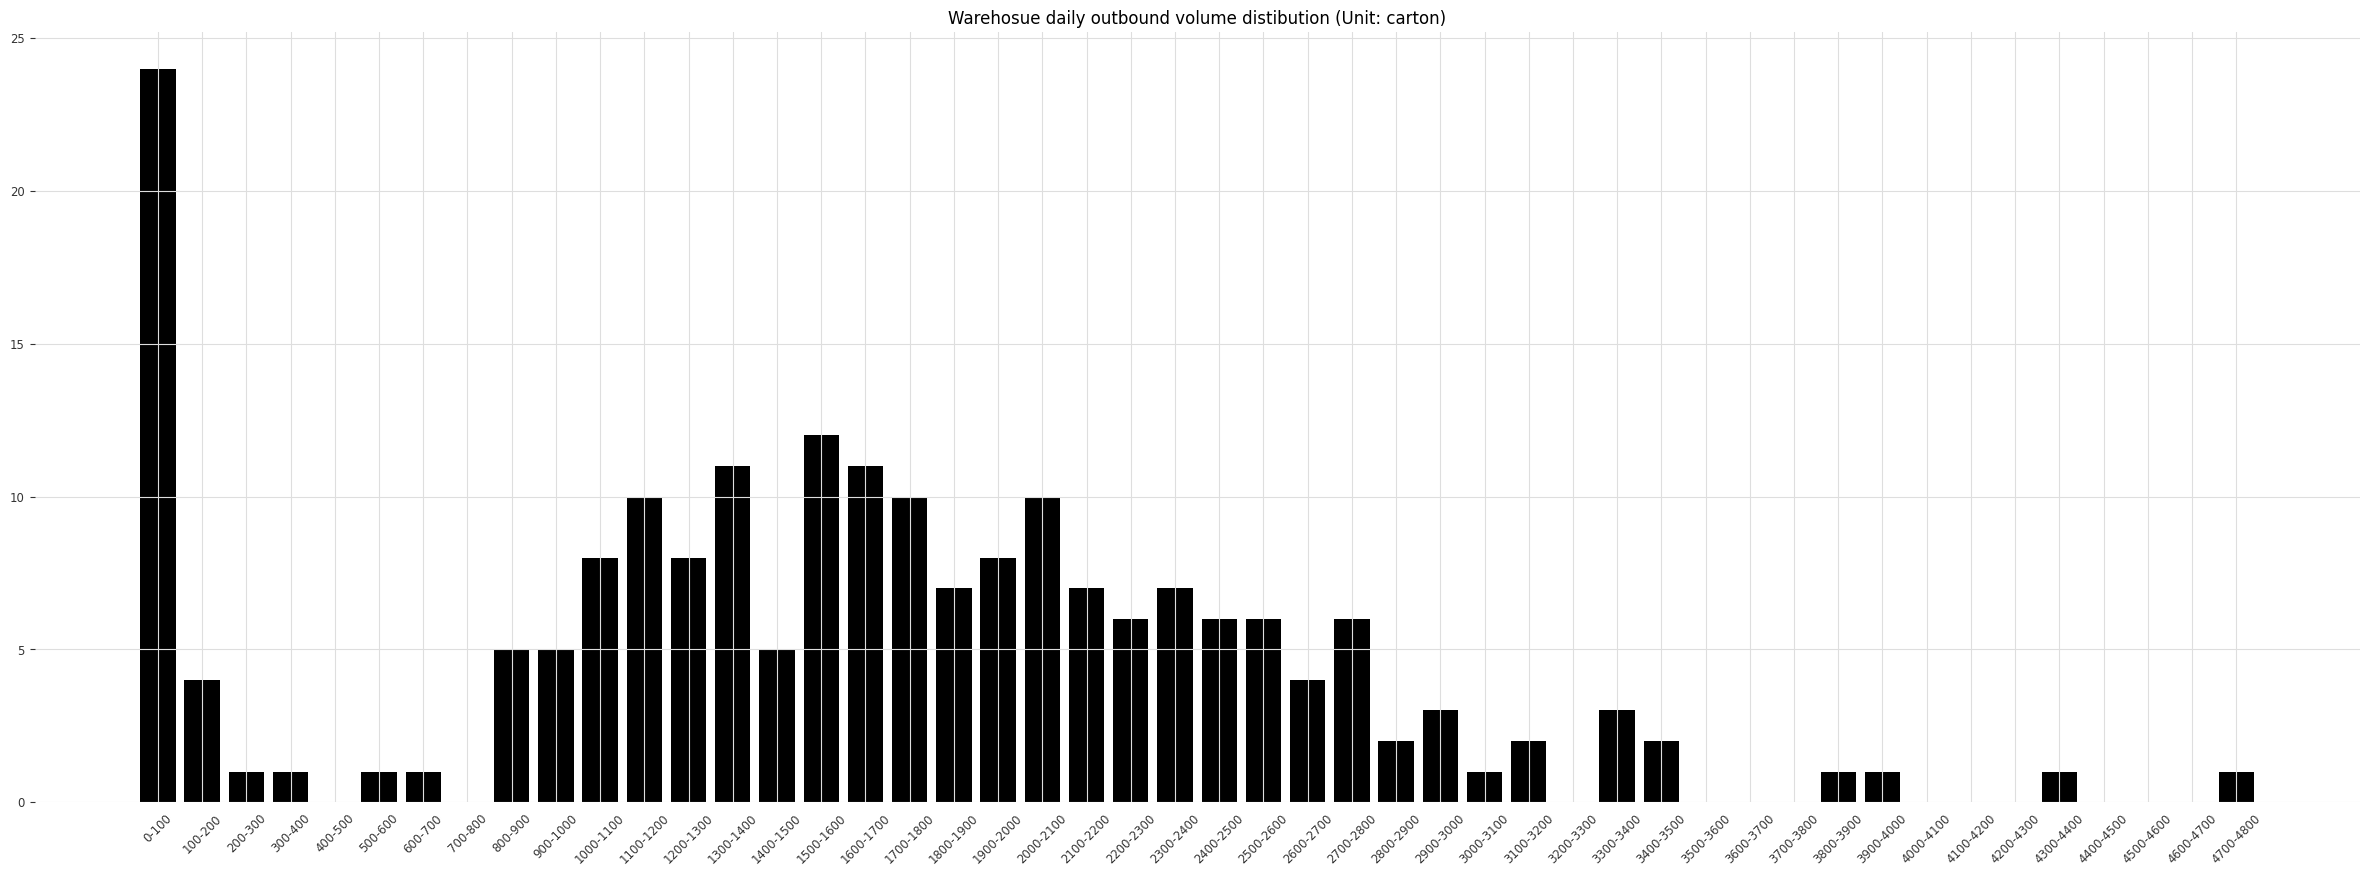

In [28]:
df_EDA = df_warehouse.copy()
df_EDA = df_EDA.loc[df_EDA['# of CTN'] !=0]
df_EDA_gp = df_EDA.groupby('# of CTN').agg({'# of CTN':'count'})
print('Zero CTN:' , df_EDA.loc[df_EDA['# of CTN'] == 0].count())

# Grouping the index by every 50 units
# Create bins from the minimum to maximum value in the index
bin_size = 100
bins = range(0, int(df_EDA_gp.index.max()) + bin_size + 1, bin_size )  # Adjusting for max

labels = [f"{i}-{i+bin_size }" for i in bins[:-1]]  # Creating labels for each bin

# Cut the index into bins
df_EDA_gp['Index Group'] = pd.cut(df_EDA_gp.index, bins=bins, labels=labels, right=False)

# Now group by the new 'Index Group' and aggregate counts
grouped_df = df_EDA_gp.groupby('Index Group').agg({'# of CTN': 'count'})

plt.figure( figsize= ( 30,10))
plt.title('Warehosue daily outbound volume distibution (Unit: carton)')
plt.xticks(rotation=45)
plt.bar(grouped_df.index, grouped_df['# of CTN'], bottom=None, align='center')
plt.savefig('/content/EDA/EDA_frequency_distribution:Warehosue_daily_outbound_volume_distibution.png')

### EDA - Descriptive Statistics

In [31]:
df_EDA.describe()
df_EDA.describe().to_csv('/content/EDA/Descriptive Statistics.csv')


#### EDA- Box plot

In [ ]:
plt.boxplot(df_EDA['# of CTN'])
plt.ylabel('# of CTN')
plt.title('Box Plot of # of CTN')
plt.show()
plt.savefig('/content/EDA/Box plot- Warehosue daily outbound volume.png')

### EDA - Outlier Detection

In [ ]:
Q1 = df_EDA['# of CTN'].quantile(0.25)
Q3 = df_EDA['# of CTN'].quantile(0.75)
IQR = Q3 - Q1


lower_boundary = Q1 - IQR * 1.5
upper_boundary = Q3 + IQR * 1.5




Q1_Q3_IQR = pd.DataFrame({
    'Q1': [Q1],
    'Q3': [Q3],
    'IQR': [IQR],
    'lower_boundary': [lower_boundary],
    'upper_boundary': [upper_boundary]
})

print(Q1_Q3_IQR.T)

outlier = df_EDA[(df_EDA['# of CTN'] < (lower_boundary)) | (df_EDA['# of CTN'] > (upper_boundary))]
print(outlier)

# save Outlier Detection
Q1_Q3_IQR.T.to_csv('/content/EDA/Q1_Q3_IQR.csv')
outlier.to_csv('/content/EDA/outlier.csv')

'''
By using brackets, you are explicitly telling pandas that you want to
create a single-row DataFrame. For example, {'Q1': [Q1]} indicates
that the column Q1 will have one entry, which is the value of Q1.

If you did not use brackets and wrote 'Q1': Q1, pandas would interpret this
as trying to create a column with multiple entries, which would lead
to an error since Q1 is just a single float value.
'''

#Statsitical

# ACF

In [ ]:
acf_lags = 14
acf_values = acf(df_warehouse_date_range['# of CTN'], nlags= acf_lags)
plt.figure(figsize=(20,5))
plt.bar(range(len(acf_values)), acf_values)


# Annotate each bar with its corresponding ACF value
for i in range(len(acf_values)):
  if acf_values[i] >= 0:
    plt.text(i, acf_values[i], f'{acf_values[i]:.3f}', ha='center', va='bottom')
  else:
    plt.text(i, acf_values[i], f'{acf_values[i]:.3f}', ha='center', va='top')

plt.title("ACF - df_warehouse_date_range")
plt.xlabel("Lag")
plt.ylabel("ACF")
print('ACF values:',acf_values)
plt.savefig('/content/ACF/ACF.png',bbox_inches='tight') # Use bbox_inches='tight' to fit the figure nicely


# PCAF

In [ ]:
pacf_nlags = 14
pacf_values = pacf(df_warehouse_date_range['# of CTN'], nlags= pacf_nlags)


plt.figure(figsize=(20,5))
plt.bar(range(len(pacf_values)), pacf_values)

# Annotate each bar with its corresponding ACF value
for i in range(len(pacf_values)):
  if pacf_values[i] >= 0:
    plt.text(i, pacf_values[i], f'{pacf_values[i]:.3f}', ha='center', va='bottom')
  else:
    plt.text(i, pacf_values[i], f'{pacf_values[i]:.3f}', ha='center', va='top')



plt.title("PACF-df_warehouse_date_range")
plt.xlabel('Lag')
plt.ylabel('PACF')

# save the PACF result
plt.savefig('/content/PACF/PACF.png',bbox_inches='tight') # Use bbox_inches='tight' to fit the figure nicely
print('PACF values:',pacf_values)

# ADF


In [ ]:
adf_result = adfuller(df_warehouse_date_range['# of CTN'], autolag = 'AIC', maxlag= 7)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Number of lags used:', adf_result[2])
print('Number of observations used:', adf_result[3])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'  {key}: {value}')

if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary; differencing may be needed.")


adf_summary = {
    'ADF Statistic': [adf_result[0]],
    'p-value': [adf_result[1]],
    'Number of lags used': [adf_result[2]],
    'Number of observations used': [adf_result[3]],
}

# Adding critical values to the summary
for key, value in adf_result[4].items():
    adf_summary[f'Critical Value ({key})'] = [value]

# Create the DataFrame
ADF_stat = pd.DataFrame(adf_summary)

# Transpose the DataFrame to turn columns into rows
ADF_stat_transposed = ADF_stat.T

# Display the DataFrame
print(ADF_stat_transposed)

# save ADF result
ADF_stat_transposed.to_csv('/content/ADF/ADF.csv')

#Machine Learning

# Machine Learning - XGBoost - For loop

### XGBoost - For loop - rerading all dataframe in folder "Dataframe_ML"

In [ ]:
df_ML_dir = '/content/Dataframe_ML'
df_ML_csv = [f for f in os.listdir(df_ML_dir) if f.endswith('.csv')]
print(df_ML_csv)


row_rmse_r2 = []
df_y_test = []
df_actual_prediction = []




for i, file in enumerate(df_ML_csv):
  print('-----------------------------------------------------------------------------------------------------------------')
  print(file)
  print('-----------------------------------------------------------------------------------------------------------------')
  file_path= os.path.join(df_ML_dir,file)
  df_ML = pd.read_csv(file_path)

  date_rng = pd.date_range(start=df_ML['date'].min(), periods=len(df_ML), freq='D')
  df_ML.index = date_rng

  # define the mumber of testing days and trainig days
  df_test_size = 7 #number_of_testing_days
  df_train_size = len(df_ML) - df_test_size #number_of_training_days


  # drop column 'time'
  if 'time' in df_ML.columns:
      df_ML.drop(columns='time', inplace=True)

  # drop column 'date'
  df_ML.drop(columns='date', inplace=True)

  # Create train and test dataset for training
  df_ML_train = df_ML.drop(columns='# of CTN')
  df_ML_test = df_ML['# of CTN']


  # Train-test split based on particular date range
  X_train, X_test = df_ML_train.iloc[:df_train_size], df_ML_train.iloc[-df_test_size :]
  y_train, y_test = df_ML_test.iloc[:df_train_size], df_ML_test.iloc[-df_test_size :]

  model = xgboost.XGBRegressor()

  # training
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  mse = mean_squared_error(y_test, prediction)
  rmse = np.sqrt(mse)
  r_square = r2_score(y_test, prediction)
  # print(f'{i}_rmse:', rmse)
  # print(f'{i}_R2:', r_square)

  row_rmse_r2.append({
      'df_ML':file.rsplit('.', 1)[0],
      'RMSE': np.round(rmse, 3),
      'R²': np.round(r_square, 3)
  })


  # Prediction ############################################################################################################################################

  # Actual
  df_y_test= pd.DataFrame({
        'date': y_test.index,
        'Actual': y_test
    })


  # Prediction - if # of CTN < 0, then 0, because # of CTN cannot be less than 0
  df_pred_data = pd.DataFrame({
        'date': y_test.index,
        'Prediction':[np.round(pred,0) if pred >= 0 else 0 for pred in prediction]
    })

  df_pred_data['date'] = pd.to_datetime(df_pred_data['date'])


  #merge actual and precdiction
  df_ML_prediction = pd.merge(df_y_test, df_pred_data, on='date', how='left')

  df_ML_prediction['df_ML'] = file.rsplit('.', 1)[0]
  print(df_ML_prediction)

  # save actual and precdiction data into a dataframe
  df_ML_prediction.to_csv(f'/content/XGBoost_Acutal_vs_Prediction/XGBoost_Acutal_vs_Prediction_{file}.csv')

  # End of a loop ############################################################################################################################################

  # plot
  plt.figure(figsize=(20,5))

  plt.plot(df_ML_prediction['date'],df_ML_prediction['Actual'], label = 'Actual', marker = 'o')
  plt.plot(df_ML_prediction['date'],df_ML_prediction['Prediction'], label = f'Prediction{file}', linestyle='--', color='orange')

  df_name_stem = file.rsplit('.', 1)[0]
  plt.title(f'7days_Prediction_vs_Actual-{df_name_stem}')

  df_actual_prediction.append(df_ML_prediction)




############################################################################################################################################



### RMSE and R-square of each dataframe


In [ ]:
# rmse_r2 result


df_row_rmse_r2 = pd.DataFrame(row_rmse_r2)
df_row_rmse_r2.to_csv('/content/XGBoost_RMSE_R2/df_ML_row_rmse_r2.csv')

print(df_row_rmse_r2)


# Visualizing all predictons and actuals (7 Days only) in one figure

In [ ]:
# Combine all predictions into a single DataFrame
combined_predictions = pd.concat(df_actual_prediction)


df_ML = combined_predictions['df_ML'].unique()
df_ML_1st = df_ML[0]
print(df_ML_1st)




plt.figure(figsize=(20, 10))

for df in df_ML:
  x = combined_predictions[combined_predictions['df_ML'] == df]['date']
  y = combined_predictions[combined_predictions['df_ML'] == df]['Prediction']
  df_name_stem = df.rsplit('.', 1)[0]
  plt.plot(x,y,linestyle='--', label=f'{df_name_stem}')

x_actual = combined_predictions[combined_predictions['df_ML'] == df_ML_1st]['date']
y_actual = combined_predictions[combined_predictions['df_ML'] == df_ML_1st]['Actual']

plt.plot(x_actual,y_actual, marker='o', color='grey', label='Actual')


plt.title('7 days - Actual vs Prediction for different features')
plt.xlabel('Date')
plt.ylabel('Number_of_CTN')
plt.xticks(rotation=45)

# Place the legend outside the plot on the right side
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

plt.grid()

# save the figure
plt.savefig('/content/XGBoost_Acutal_vs_Prediction/7_days_Actual_vs_Prediction_for_different_features.png')

# Visulaizing all predictions

In [ ]:
# add df_ml column to df_warehouse_date_range
df_warehouse_date_range['df_ML'] = 'df_warehouse_date_range'
df_warehouse_date_range.rename(columns={'# of CTN':'Actual'}, inplace=True)


# define the mumber of testing days and trainig days
df_test_size = 7 #number_of_testing_days
df_train_size = len(df_warehouse_date_range) - df_test_size #number_of_training_days

# define the date range of df_train
df_warehouse_date_range_train = df_warehouse_date_range.iloc[:df_train_size]


# limit the date range of efine the date range of df_train to last 30 days to last 8 days ( 30 days before prediction)
df_warehouse_date_range_train = df_warehouse_date_range.iloc[-(23 + df_test_size):-df_test_size]


# merge the df_warehouse_date_range_train and predictions
df_full_date_range_prediction = pd.concat([df_warehouse_date_range_train,combined_predictions],ignore_index=True)

# Creat a figure
plt.figure(figsize=(30, 15))


for df in df_ML:
    x = df_full_date_range_prediction[df_full_date_range_prediction['df_ML'] == df]['date']
    y = df_full_date_range_prediction[df_full_date_range_prediction['df_ML'] == df]['Prediction']
    df_name_stem = df.rsplit('.', 1)[0]
    plt.plot(x,y,linestyle='--', label=f'{df_name_stem}')

df_full_date_range_prediction.to_csv('/content/ACF/df_full_date_range_prediction.csv')
# # # actual - date range and actual data
x_actual = df_full_date_range_prediction[df_full_date_range_prediction['df_ML'] == 'df_warehouse_date_range']['date']
y_actual = df_full_date_range_prediction[df_full_date_range_prediction['df_ML'] == 'df_warehouse_date_range']['Actual']


plt.plot(x_actual,y_actual, marker='o',color='grey', label='Actual')


#  vertical line - first prediction day
df_warehouse_date_range_test = df_warehouse_date_range.iloc[-7:]['date'][0]


#   create the vertical line
plt.axvline(x = df_warehouse_date_range_test, color = 'black', label = 'Prediction period')


ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(mdates.DayLocator())  # Set major ticks to be daily
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date

# Place the legend outside the plot on the right side
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

plt.title('Actual vs Prediction Over Time for different features')
plt.xlabel('Date')
plt.ylabel('Number_of_CTN')
plt.xticks(rotation=45)
plt.grid()

# save the figure
plt.savefig('/content/XGBoost_Acutal_vs_Prediction/Actual_vs_Prediction_Over Time_for_different_features.png')